# Employee Attrition Classification Project

**Employee attrition—when employees leave an organization—can be costly for companies in terms of recruitment, training, and lost productivity. Predicting which employees are likely to leave can help HR teams take proactive measures to retain talent and reduce turnover.**





In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [141]:
# read the data

df = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis


In [142]:
print(df.columns)
print("-------------------")
print(df.shape)
df.info()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
-------------------
(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-nul

In [143]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [144]:
for col in df.columns:
    print(col, ":", df[col].nunique())


Age : 43
Attrition : 2
BusinessTravel : 3
DailyRate : 886
Department : 3
DistanceFromHome : 29
Education : 5
EducationField : 6
EmployeeCount : 1
EmployeeNumber : 1470
EnvironmentSatisfaction : 4
Gender : 2
HourlyRate : 71
JobInvolvement : 4
JobLevel : 5
JobRole : 9
JobSatisfaction : 4
MaritalStatus : 3
MonthlyIncome : 1349
MonthlyRate : 1427
NumCompaniesWorked : 10
Over18 : 1
OverTime : 2
PercentSalaryHike : 15
PerformanceRating : 2
RelationshipSatisfaction : 4
StandardHours : 1
StockOptionLevel : 4
TotalWorkingYears : 40
TrainingTimesLastYear : 7
WorkLifeBalance : 4
YearsAtCompany : 37
YearsInCurrentRole : 19
YearsSinceLastPromotion : 16
YearsWithCurrManager : 18


In [145]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [146]:
#discover the outliers
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if df[col].nunique() > 1]  

outlier_summary = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    count = len(outliers)
    pct = (count / len(df)) * 100
    outlier_summary.append({'Feature': col, 'Outliers Count': count, 'Outliers %': pct})

outlier_df = pd.DataFrame(outlier_summary).sort_values(by='Outliers %', ascending=False)
outlier_df


,Feature,Outliers Count,Outliers %
18,TrainingTimesLastYear,238,16.190476
14,PerformanceRating,226,15.374150
10,MonthlyIncome,114,7.755102
22,YearsSinceLastPromotion,107,7.278912
20,YearsAtCompany,104,7.074830
16,StockOptionLevel,85,5.782313
17,TotalWorkingYears,63,4.285714
12,NumCompaniesWorked,52,3.537415
21,YearsInCurrentRole,21,1.428571
23,YearsWithCurrManager,14,0.952381


In [147]:
#discover the target column values

df['Attrition'].value_counts(), df['Attrition'].value_counts(normalize=True)*100




(Attrition
 No     1233
 Yes     237
 Name: count, dtype: int64,
 Attrition
 No     83.877551
 Yes    16.122449
 Name: proportion, dtype: float64)

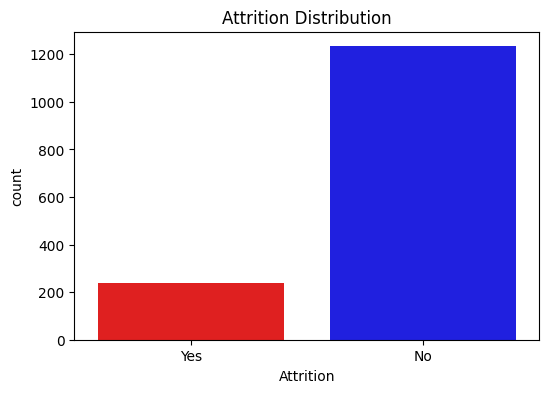

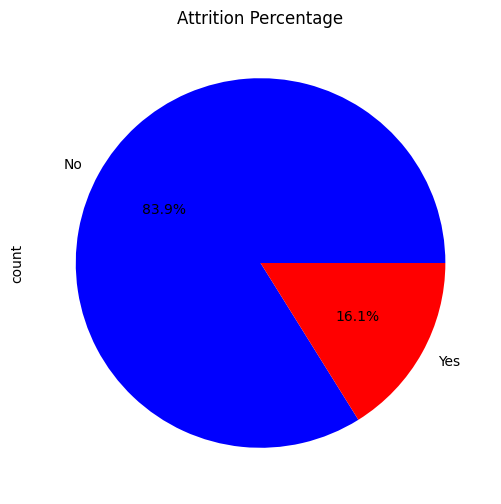

In [148]:
palette = {'Yes': 'red', 'No': 'blue'}

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition', palette=palette)
plt.title('Attrition Distribution')
plt.show()

colors = ['blue', 'red']  

df['Attrition'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(6,6), colors=colors
)
plt.title('Attrition Percentage')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


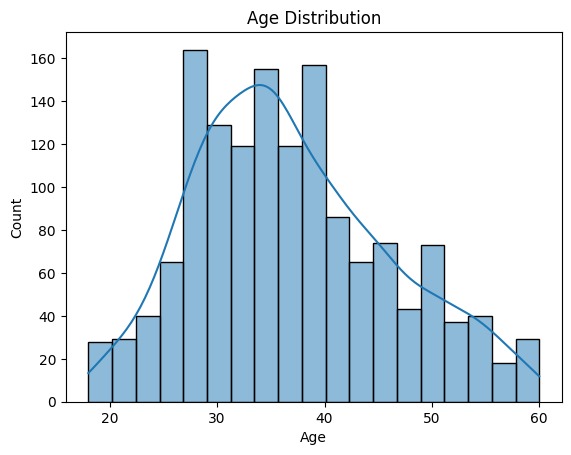

In [149]:
#understand the data


sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


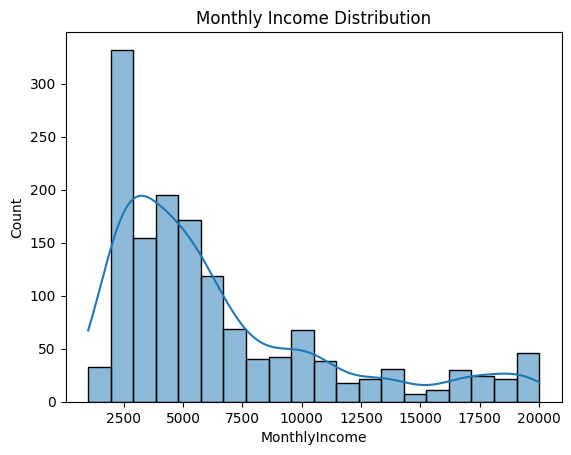

In [150]:
sns.histplot(df['MonthlyIncome'], kde=True)
plt.title('Monthly Income Distribution')
plt.show()


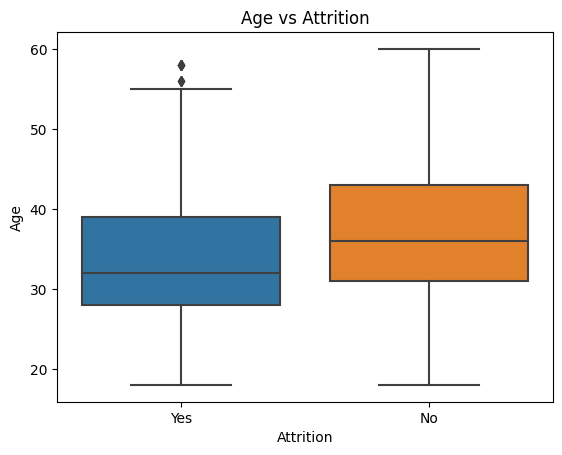

In [151]:
sns.boxplot(data=df, x='Attrition', y='Age')
plt.title('Age vs Attrition')
plt.show()


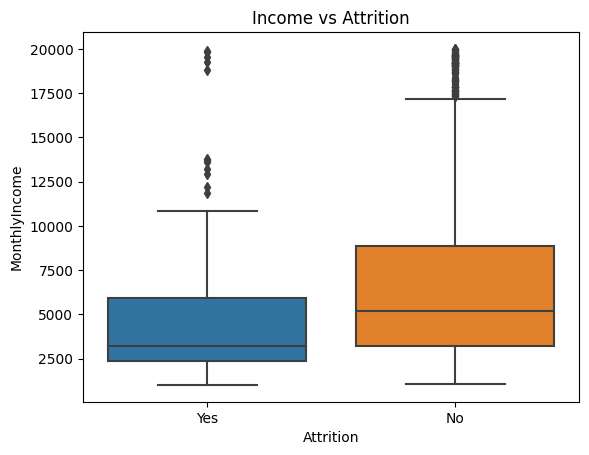

In [152]:
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Income vs Attrition')
plt.show()


# Data Preprocessing


In [153]:
#drop  unuseful columns 
cols_to_drop = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
df.drop(columns=cols_to_drop, inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [154]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [155]:
#  Label Encoding


le = LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])

df['Gender'] = le.fit_transform(df['Gender'])

df['OverTime'] = le.fit_transform(df['OverTime'])


                                  
df['Attrition'] ,df['Gender'], df['OverTime'] 

(0       1
 1       0
 2       1
 3       0
 4       0
        ..
 1465    0
 1466    0
 1467    0
 1468    0
 1469    0
 Name: Attrition, Length: 1470, dtype: int64,
 0       0
 1       1
 2       1
 3       0
 4       1
        ..
 1465    1
 1466    1
 1467    1
 1468    1
 1469    1
 Name: Gender, Length: 1470, dtype: int64,
 0       1
 1       0
 2       1
 3       1
 4       0
        ..
 1465    0
 1466    0
 1467    1
 1468    0
 1469    0
 Name: OverTime, Length: 1470, dtype: int64)

In [156]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols


['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [157]:
#one hot encoding

multi_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

ohe = OneHotEncoder(drop='first', sparse_output=False)

encoded = ohe.fit_transform(df[multi_cols])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(multi_cols), index=df.index)

df = pd.concat([df.drop(columns=multi_cols), encoded_df], axis=1)

print("New shape:", df.shape)


New shape: (1470, 45)


In [158]:
df.columns.tolist()

['Age',
 'Attrition',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_S

In [159]:
pd.set_option('display.max_columns', None)  
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [160]:
 #remove outliers
 outliers_cols= [ 'TrainingTimesLastYear', 'PerformanceRating', 'MonthlyIncome', 
    'YearsSinceLastPromotion', 'YearsAtCompany', 'StockOptionLevel', 
    'TotalWorkingYears', 'NumCompaniesWorked', 'YearsInCurrentRole', 
    'YearsWithCurrManager']

for col in outliers_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)  






for col in outliers_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"{col}: Outliers count = {outliers.shape[0]}")


TrainingTimesLastYear: Outliers count = 0
PerformanceRating: Outliers count = 0
MonthlyIncome: Outliers count = 0
YearsSinceLastPromotion: Outliers count = 0
YearsAtCompany: Outliers count = 0
StockOptionLevel: Outliers count = 0
TotalWorkingYears: Outliers count = 0
NumCompaniesWorked: Outliers count = 0
YearsInCurrentRole: Outliers count = 0
YearsWithCurrManager: Outliers count = 0


In [161]:
#scaling the data
num_cols_to_scale = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education',
    'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
    'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
    'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

df_scaled = df.copy()

scaler = StandardScaler()
df_scaled[num_cols_to_scale] = scaler.fit_transform(df[num_cols_to_scale])

#df_scaled[num_cols_to_scale]
df_scaled.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,1,0.742527,-1.010909,-0.891688,-0.660531,0,1.383138,0.379672,-0.057788,1.153254,-0.084766,0.726020,2.169877,1,-1.150554,0.0,-1.584178,-0.978160,-0.424999,-2.130765,-2.493820,-0.123832,-0.058474,-0.776139,0.253823,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.322365,0,-1.297775,-0.147150,-1.868426,0.254625,1,-0.240677,-1.026167,-0.057788,-0.660853,-0.283072,1.488876,-0.682817,0,2.129306,0.0,1.191438,0.300537,-0.151076,0.278639,0.338096,0.678078,0.785616,-0.372486,0.822605,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.008343,1,1.414363,-0.887515,-0.891688,1.169781,1,1.284725,-1.026167,-0.961486,0.246200,-0.981623,-1.674841,1.354822,1,-0.057267,0.0,-0.658973,-0.978160,-0.561960,0.278639,0.338096,-1.326697,-1.183926,-0.776139,-1.168130,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.429664,0,1.461466,-0.764121,1.061787,1.169781,0,-0.486709,0.379672,-0.961486,0.246200,-0.793428,1.243211,-0.682817,1,-1.150554,0.0,0.266233,-0.978160,-0.424999,0.278639,0.338096,0.277123,0.785616,0.434819,-1.168130,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.086676,0,-0.524295,-0.887515,-1.868426,-1.575686,1,-1.274014,0.379672,-0.961486,-0.660853,-0.664977,0.325900,2.373641,0,-0.877232,0.0,1.191438,0.300537,-0.698921,0.278639,0.338096,-0.925742,-0.621200,0.031166,-0.599348,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [162]:
# split the data into x,y
X = df_scaled.drop(columns=['Attrition'])

y = df_scaled['Attrition']

X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.2, random_state=42,stratify=y )





#  LogisticRegression


Accuracy: 0.8639455782312925

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.64      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.85      0.86      0.85       294


Confusion Matrix:
 [[238   9]
 [ 31  16]]


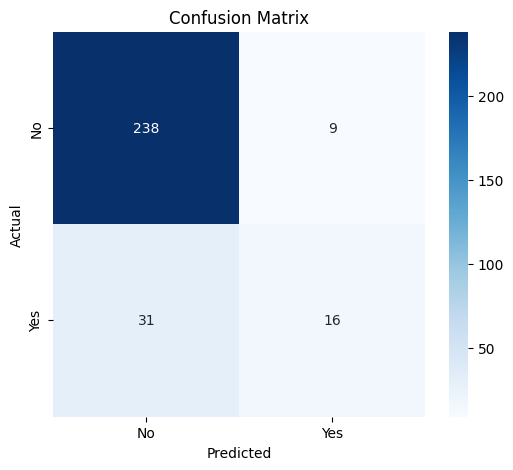

In [163]:
log_model = LogisticRegression(max_iter=1000, random_state=42)

log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Support Vector Machine (SVC) 

Accuracy: 0.8605442176870748

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.80      0.17      0.28        47

    accuracy                           0.86       294
   macro avg       0.83      0.58      0.60       294
weighted avg       0.85      0.86      0.82       294


Confusion Matrix:
 [[245   2]
 [ 39   8]]


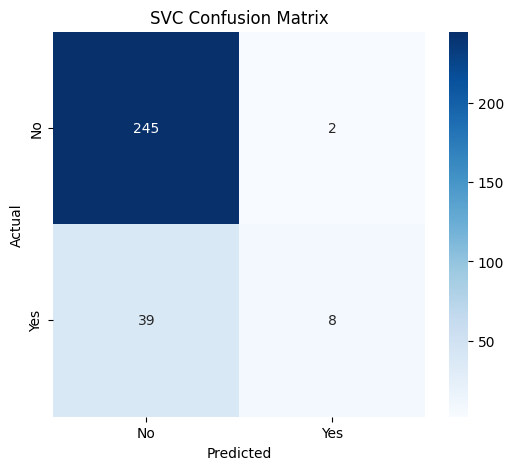

In [164]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)



print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC Confusion Matrix')
plt.show()

 

# XGBoost Classifier

Accuracy: 0.8605442176870748

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.67      0.26      0.37        47

    accuracy                           0.86       294
   macro avg       0.77      0.62      0.65       294
weighted avg       0.84      0.86      0.83       294


Confusion Matrix:
 [[241   6]
 [ 35  12]]


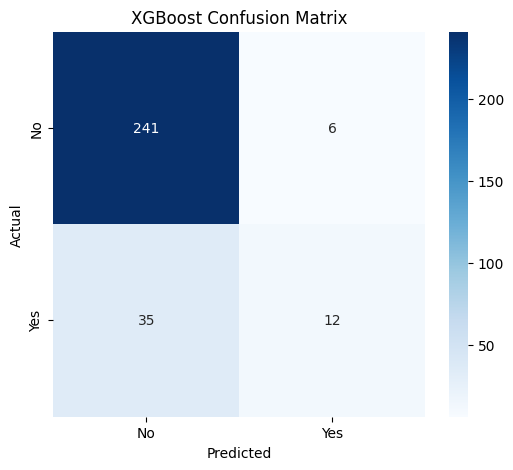

In [165]:
xgb_model = XGBClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    gamma=0.1,
    random_state=42,
    eval_metric='logloss'
)



xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

#  Conclusion


****The goal of this project was to build a predictive model for employee attrition using machine learning techniques. After performing exploratory analysis,data preprocessing,several classification models were trained and evaluated.****

****Logistic Regression,  SVC    and   XGBoost  achieved the best overall performance, reaching an accuracy of 86%.
The models showed very strong performance in predicting the majority class (No Attrition) . Although predicting the minority class remains challenging due to the nature of HR datasets****